# Analysis of distribution of my own dataset

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
sns.set_style("dark")

In [3]:
df = pd.read_csv('steam.csv', sep=',')

In [4]:
df.pop('appid')
# Convert english too boolean
df['english'] = df['english'].astype('bool')
# set release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
# create 3 seperate platform fields instead of 1
df['windows'], df['mac'], df['linux'] = df['platforms'].apply(lambda x: 'windows' in x),df['platforms'].apply(lambda x: 'mac' in x),df['platforms'].apply(lambda x: 'linux' in x)
# Split owners categorical value in two numerical values
df['owners_low'] = df['owners'].apply(lambda x: x.split('-')[0]).astype('int')
df['owners_high'] = df['owners'].apply(lambda x: x.split('-')[1]).astype('int')
# Create int out of data column
df['release_year'] = df['release_date'].dt.year
genres = df['genres'].apply(lambda x: x.split(';')[0])

In [5]:
medianPlaytimeFilter = df['median_playtime']> 1.5
ownersFilter = df['owners_low'] > 20000 #lowest range above 0
noFreeGameFilter = df['price'] > 0.1
reviewFilter = df['positive_ratings'] > 5

# Games by year
Exponential curve

C:\Users\Stijn\AppData\Local\Temp/ipykernel_11432/3507090343.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['owners_low'] > 50000][df['median_playtime']> 30]['release_year'].value_counts().sort_values().plot(kind='bar')


<AxesSubplot:>

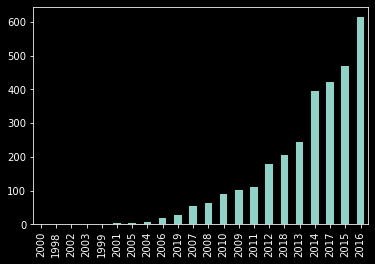

In [6]:
df[df['owners_low'] > 50000][df['median_playtime']> 30]['release_year'].value_counts().sort_values().plot(kind='bar')

# Prices of games
logarithmic curve  
(filtered out outliers and the games that nearly nobody owns/playes)

It seems there are many free games

C:\Users\Stijn\AppData\Local\Temp/ipykernel_9580/3573847891.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['price'] < 200][ownersFilter][medianPlaytimeFilter][reviewFilter]['price'].plot(kind='hist',bins=13)


<AxesSubplot:ylabel='Frequency'>

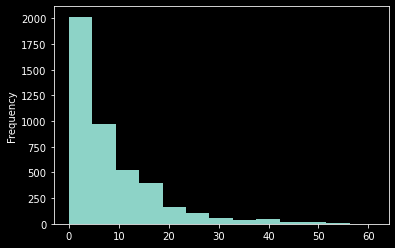

In [ ]:
df[df['price'] < 200][ownersFilter][medianPlaytimeFilter][reviewFilter]['price'].plot(kind='hist',bins=13)

# Price of payed games  
logarithmic curve

C:\Users\Stijn\AppData\Local\Temp/ipykernel_9580/791919376.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['price']> 0][df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].plot(kind='hist',bins=13)


<AxesSubplot:ylabel='Frequency'>

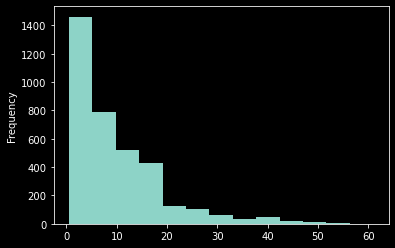

In [ ]:
df[df['price']> 0][df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].plot(kind='hist',bins=13)